In [1]:
import tensorflow as tf
import keras
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn.preprocessing import OneHotEncoder 
import seaborn as sns

In [2]:
iris_data = load_iris(as_frame=True)

features = iris_data["data"]
target = iris_data["target"]


data = pd.concat([features, target], axis=1)

interest = data.query("target != 2").iloc[:, ::2].to_numpy().astype(np.float32)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(interest[:, :2], interest[:, -1], test_size=0.2)

x_input = x_train.shape[1]

Problem 3

In [4]:
model = keras.Sequential()

model.add(keras.layers.Input((x_input,), 20))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, keras.activations.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.compile(optimizer="adam", loss=keras.losses.binary_crossentropy, metrics=["accuracy"])

model.fit(x_train, y_train, epochs=20)



Epoch 1/20


3/3 [==============================] - 8s 73ms/step - loss: 0.7810 - accuracy: 0.2000
Epoch 2/20
3/3 [==============================] - 0s 76ms/step - loss: 0.7175 - accuracy: 0.4750
Epoch 3/20
3/3 [==============================] - 0s 7ms/step - loss: 0.6762 - accuracy: 0.4750
Epoch 4/20
3/3 [==============================] - 0s 9ms/step - loss: 0.6277 - accuracy: 0.4750
Epoch 5/20
3/3 [==============================] - 0s 6ms/step - loss: 0.5845 - accuracy: 0.7875
Epoch 6/20
3/3 [==============================] - 0s 9ms/step - loss: 0.5452 - accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 0s 8ms/step - loss: 0.5089 - accuracy: 1.0000
Epoch 8/20
3/3 [==============================] - 0s 8ms/step - loss: 0.4701 - accuracy: 1.0000
Epoch 9/20
3/3 [==============================] - 0s 7ms/step - loss: 0.4317 - accuracy: 1.0000
Epoch 10/20
3/3 [==============================] - 0s 3ms/step - loss: 0.3959 - accuracy: 1.0000
Epoch 11/20
3/3 [================

In [5]:
model = keras.Sequential()

model.add(keras.layers.Input((x_input,), 20))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, keras.activations.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.compile(optimizer="adam", loss=keras.losses.binary_crossentropy, metrics=["accuracy"])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
3/3 [==============================] - 1s 4ms/step - loss: 0.7335 - accuracy: 0.5250
Epoch 2/20
3/3 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.8500
Epoch 3/20
3/3 [==============================] - 0s 4ms/step - loss: 0.5974 - accuracy: 0.9875
Epoch 4/20
3/3 [==============================] - 0s 4ms/step - loss: 0.5590 - accuracy: 0.9500
Epoch 5/20
3/3 [==============================] - 0s 4ms/step - loss: 0.5278 - accuracy: 0.9750
Epoch 6/20
3/3 [==============================] - 0s 4ms/step - loss: 0.4964 - accuracy: 0.9875
Epoch 7/20
3/3 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 1.0000
Epoch 8/20
3/3 [==============================] - 0s 4ms/step - loss: 0.4343 - accuracy: 1.0000
Epoch 9/20
3/3 [==============================] - 0s 4ms/step - loss: 0.4044 - accuracy: 1.0000
Epoch 10/20
3/3 [==============================] - 0s 5ms/step - loss: 0.3762 - accuracy: 1.0000
Epoch 11/20
3/3 [======================

1/1 - 0s - loss: 0.1430 - accuracy: 1.0000 - 261ms/epoch - 261ms/step
1/1 [==============================] - 0s 121ms/step


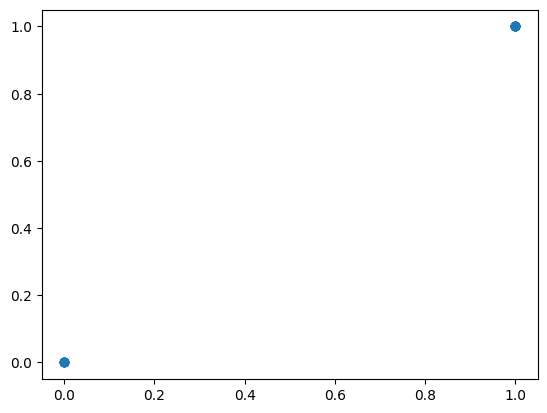

In [6]:
model.evaluate(x_test, y_test, verbose=2)

pred = model.predict(x_test)

plt.scatter(np.where(pred > 0.5, 1, 0), y_test)

Problem 4

In [7]:
class MultiClassification(keras.Model):
    def __init__(self, n_class):
        super().__init__()
        
        self.dense1 = keras.layers.Dense(100, activation="relu")
        self.dense2 = keras.layers.Dense(50, activation="relu")
        self.out = keras.layers.Dense(n_class, activation= "softmax")
    
    def call(self, input, training=False):
        x = self.dense1(input)
        x = self.dense2(x)

        return self.out(x)

In [8]:
x = features.to_numpy()
onv = OneHotEncoder(sparse_output=False)

target = target.to_numpy().reshape(-1, 1)
target = onv.fit_transform(target)
x_train, x_test, y_train, y_test = train_test_split(features.to_numpy(), target, test_size=0.2)



x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.2)

In [9]:
model = MultiClassification(3)

model.compile(optimizer="Adam", loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

model.fit(x_train, y_train, epochs=40, batch_size=20, validation_data=[x_val, y_val])

Epoch 1/40
5/5 [==============================] - 2s 72ms/step - loss: 1.1660 - accuracy: 0.3438 - val_loss: 1.1297 - val_accuracy: 0.2500
Epoch 2/40
5/5 [==============================] - 0s 12ms/step - loss: 0.9912 - accuracy: 0.4688 - val_loss: 0.9559 - val_accuracy: 0.6250
Epoch 3/40
5/5 [==============================] - 0s 12ms/step - loss: 0.8497 - accuracy: 0.7188 - val_loss: 0.8248 - val_accuracy: 0.6250
Epoch 4/40
5/5 [==============================] - 0s 15ms/step - loss: 0.7537 - accuracy: 0.8229 - val_loss: 0.7473 - val_accuracy: 0.6250
Epoch 5/40
5/5 [==============================] - 0s 12ms/step - loss: 0.6812 - accuracy: 0.7500 - val_loss: 0.7068 - val_accuracy: 0.6250
Epoch 6/40
5/5 [==============================] - 0s 12ms/step - loss: 0.6213 - accuracy: 0.7188 - val_loss: 0.6320 - val_accuracy: 0.6250
Epoch 7/40
5/5 [==============================] - 0s 15ms/step - loss: 0.5663 - accuracy: 0.8021 - val_loss: 0.5721 - val_accuracy: 0.7917
Epoch 8/40
5/5 [===========

In [10]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 50ms/step - loss: 0.2177 - accuracy: 0.9667


[0.21768544614315033, 0.9666666388511658]

1/1 [==============================] - 0s 172ms/step


Text(0.5, 0, ' prediction')

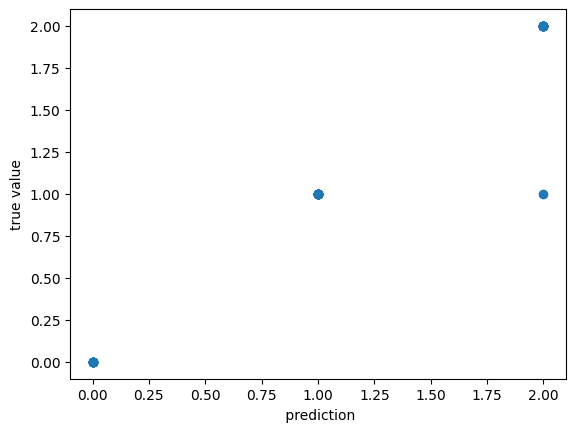

In [11]:
pred = np.argmax(model.predict(x_test), 1)

plt.scatter(pred, np.argmax(y_test, 1))
plt.ylabel("true value")
plt.xlabel(" prediction")

Problem 5

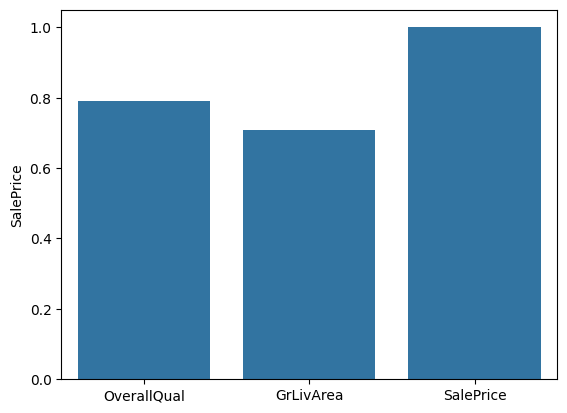

In [12]:
houseData = pd.read_csv("./data/train.csv")

potential = houseData.corr(numeric_only=True)["SalePrice"]
potential = potential[potential > 0.65]

sns.barplot(potential)

features = potential.keys()

x_train, x_test, y_train, y_test = train_test_split(houseData[features].to_numpy(), houseData["SalePrice"], test_size=0.2)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [13]:
class LinearRegression(keras.Model):
    def __init__(self):
        super().__init__()
        self.layer1 = keras.layers.Dense(500)
        self.layer2 = keras.layers.Dense(250)
        self.layer3 = keras.layers.Dense(125)
        self.layer4 = keras.layers.Dense(20)
        self.out = keras.layers.Dense(1)
    
    def call(self, x_input):
        x = self.layer1(x_input)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        return self.out(x)

In [14]:
linear = LinearRegression()

linear.compile(optimizer=keras.optimizers.Adam(1e-4), loss=keras.losses.mean_squared_logarithmic_error)
linear.fit(x_train, y_train, epochs=50, batch_size=20, validation_data=[x_val, y_val])

Epoch 1/50
47/47 [==============================] - 2s 11ms/step - loss: 0.1214 - val_loss: 3.2532e-04
Epoch 2/50
47/47 [==============================] - 0s 5ms/step - loss: 5.8943e-04 - val_loss: 5.8691e-05
Epoch 3/50
47/47 [==============================] - 0s 5ms/step - loss: 6.8368e-06 - val_loss: 5.4036e-07
Epoch 4/50
47/47 [==============================] - 0s 5ms/step - loss: 1.0493e-07 - val_loss: 4.0886e-08
Epoch 5/50
47/47 [==============================] - 0s 5ms/step - loss: 4.5829e-08 - val_loss: 4.0377e-08
Epoch 6/50
47/47 [==============================] - 0s 5ms/step - loss: 4.5173e-08 - val_loss: 4.0060e-08
Epoch 7/50
47/47 [==============================] - 0s 5ms/step - loss: 4.5348e-08 - val_loss: 4.0637e-08
Epoch 8/50
47/47 [==============================] - 0s 5ms/step - loss: 4.5214e-08 - val_loss: 3.9410e-08
Epoch 9/50
47/47 [==============================] - 0s 5ms/step - loss: 4.4888e-08 - val_loss: 3.9254e-08
Epoch 10/50
47/47 [==============================

10/10 [==============================] - 0s 7ms/step


Text(0, 0.5, 'True value')

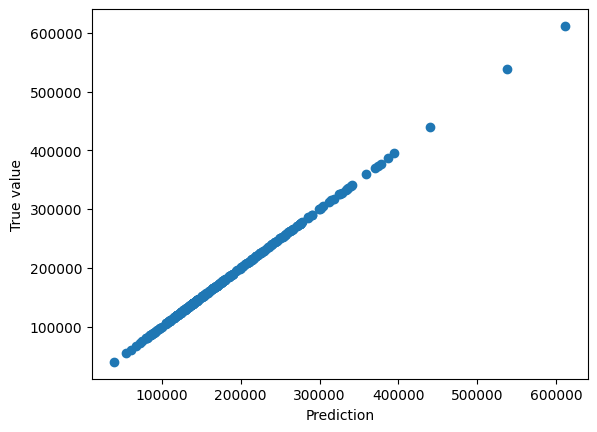

In [15]:
pred = linear.predict(x_test)

plt.scatter(pred, y_test)
plt.xlabel("Prediction")
plt.ylabel("True value")

In [16]:
from keras.datasets.mnist import load_data

In [17]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train, x_test = x_train.reshape(-1, 784), x_test.reshape(-1, 784)
x_train, x_test = x_train/255, x_test/255


y_train = y_train.reshape(-1, 1)
y_train = onv.fit_transform(y_train)

In [18]:
model = MultiClassification(10)

model.compile(optimizer="Adam", loss=keras.losses.categorical_crossentropy, metrics=["accuracy", "recall"])
model.fit(x_train[:10000], y_train[:10000], epochs=50, batch_size=20)

Epoch 1/50


TypeError: in user code:

    File "c:\Users\cbt04\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\cbt04\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\cbt04\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\cbt04\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1155, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\Users\cbt04\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\Users\cbt04\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "c:\Users\cbt04\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "c:\Users\cbt04\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\metrics\base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "c:\Users\cbt04\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\metrics\base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: 'str' object is not callable


In [19]:
pred = np.argmax(model.predict(x_test), 1)

y_test

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [20]:
c = sum(pred == y_test * 1)

accuracy = c/pred.shape[0]

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.08


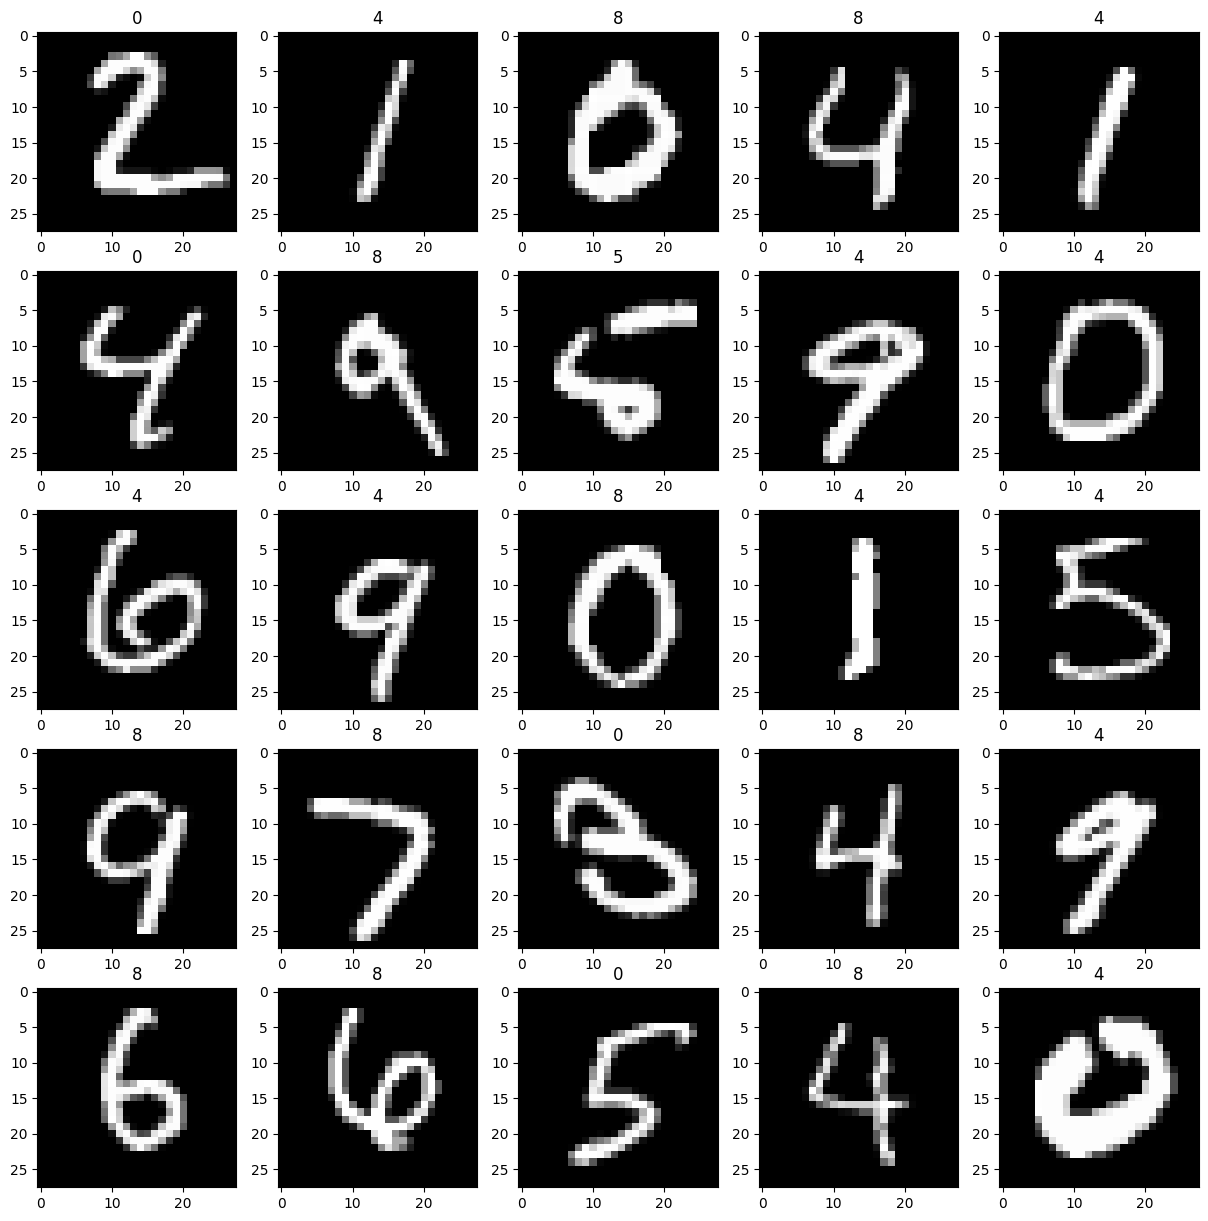

In [21]:
fig = plt.figure(figsize=(15, 15))
x_test = x_test.reshape(-1, 28, 28)
for i in range(1, 26):
    axes = plt.subplot(5, 5, i)
    axes.imshow(x_test[i], "grey")
    axes.set_title(pred[i])